In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

---

### Get the Philippines shape file
All of my relatives live within Metro Manila, so I decided to get `gadm36_PHL_2.shp` instead of `gadm36_PHL_1.shp` since the earlier is more detailed and shows the actual subdivisions within provinces. 

In [2]:
ph_detailed = gpd.read_file(os.getenv('DSDATA') + '/gadm36_PHL_shp/gadm36_PHL_2.shp')
ph_detailed.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"POLYGON ((120.62710 17.49300, 120.62177 17.493..."
1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"POLYGON ((120.99042 17.39802, 120.98631 17.387..."
2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"POLYGON ((120.70788 17.45395, 120.70621 17.455..."
3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,"POLYGON ((120.78956 17.41699, 120.78922 17.445..."
4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,"POLYGON ((120.92917 17.41307, 120.92464 17.413..."


Plot to check the shape files first.

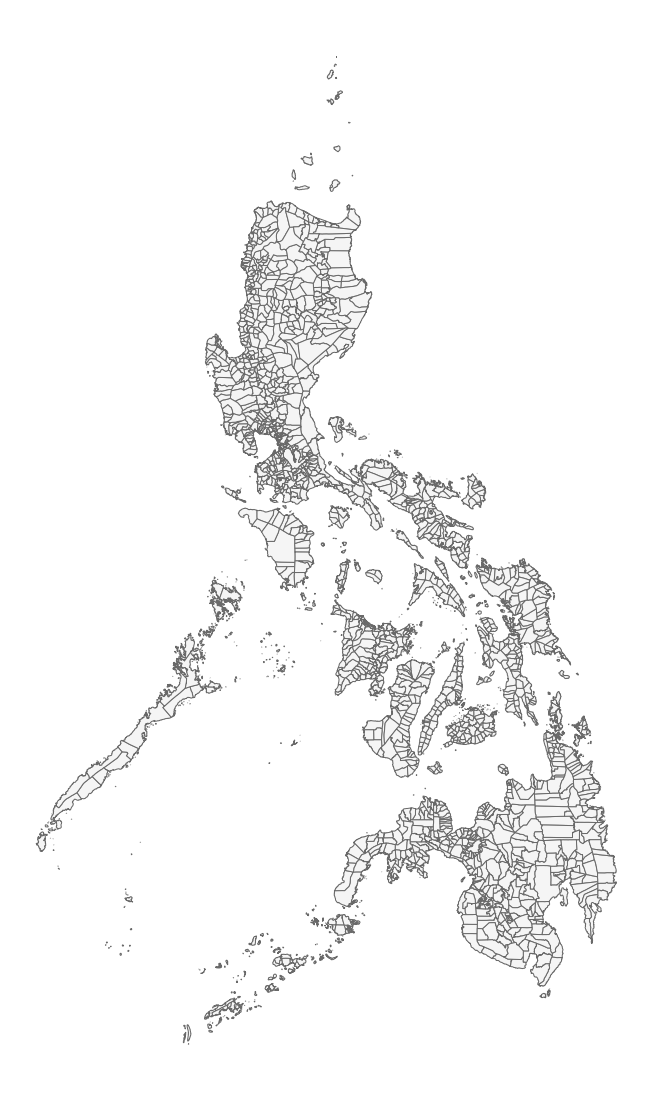

In [3]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ax.axis(False)

ph_detailed.plot(ax=ax, color='whitesmoke', edgecolor='dimgray')

### Get the healthsites JSON file

In [4]:
healthsites = gpd.read_file(os.getenv('DSDATA') + '/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


Replace the blank entries in the `amenity` column to 'unknown'.

In [5]:
healthsites['amenity'] = healthsites['amenity'].apply(lambda x: "unknown" if not x else x)

Double check to see if it's been cleaned out.

In [6]:
healthsites['amenity'].unique()

array(['pharmacy', 'doctors', 'hospital', 'clinic', 'dentist', 'unknown',
       'laboratory', 'social_facility', 'healthcare'], dtype=object)

---

### Check the projection if they're the same.

In [7]:
print(ph_detailed.crs)
print(healthsites.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


In [8]:
ph_detailed.columns

Index(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'NL_NAME_1', 'GID_2', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry'],
      dtype='object')

In [9]:
ph_detailed["NAME_1"].unique()

array(['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay',
       'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes',
       'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan',
       'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz',
       'Catanduanes', 'Cavite', 'Cebu', 'Compostela Valley',
       'Davao del Norte', 'Davao del Sur', 'Davao Oriental',
       'Dinagat Islands', 'Eastern Samar', 'Guimaras', 'Ifugao',
       'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kalinga',
       'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte',
       'Maguindanao', 'Marinduque', 'Masbate', 'Metropolitan Manila',
       'Misamis Occidental', 'Misamis Oriental', 'Mountain Province',
       'Negros Occidental', 'Negros Oriental', 'North Cotabato',
       'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya',
       'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga',
       'Pangasinan', 'Quezon', 'Quirino', 'Riza

In [10]:
mm = ph_detailed[ph_detailed.NAME_1 == 'Metropolitan Manila']

In [11]:
mm["NAME_2"].unique()

array(['Kalookan City', 'Las PiÃ±as', 'Makati City', 'Malabon',
       'Mandaluyong', 'Manila', 'Marikina', 'Muntinlupa', 'Navotas',
       'ParaÃ±aque', 'Pasay City', 'Pasig City', 'Pateros', 'Quezon City',
       'San Juan', 'Taguig', 'Valenzuela'], dtype=object)

### Extract shape files for the cities
- Get the geometries for **Manila, Quezon City, and Pasay City**, where the majority of my family resides in.

In [12]:
mm_mnl = mm[mm.NAME_2 == 'Manila']
mm_qc = mm[mm.NAME_2 == 'Quezon City']
mm_pasay = mm[mm.NAME_2 == 'Pasay City']

### Plot the maps
---
### Manila

**How many health-related amenities are there in Manila?**

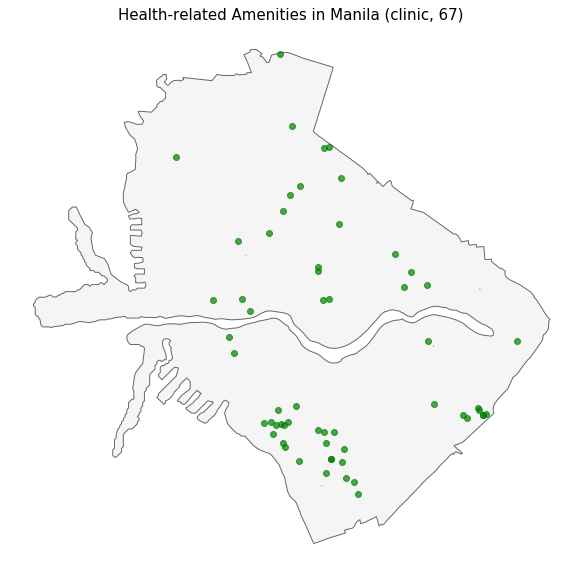

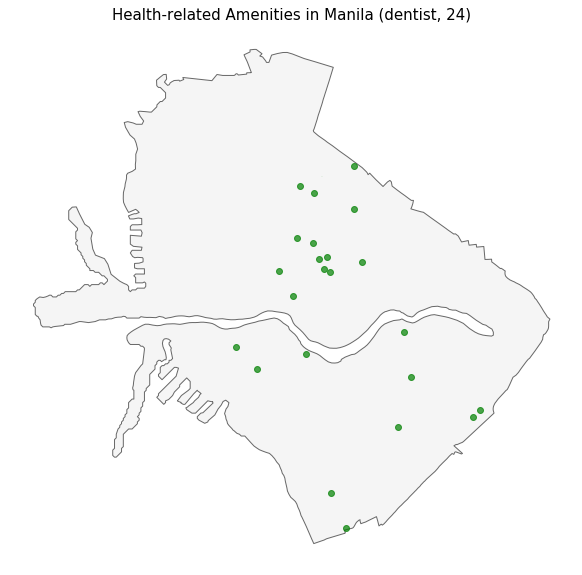

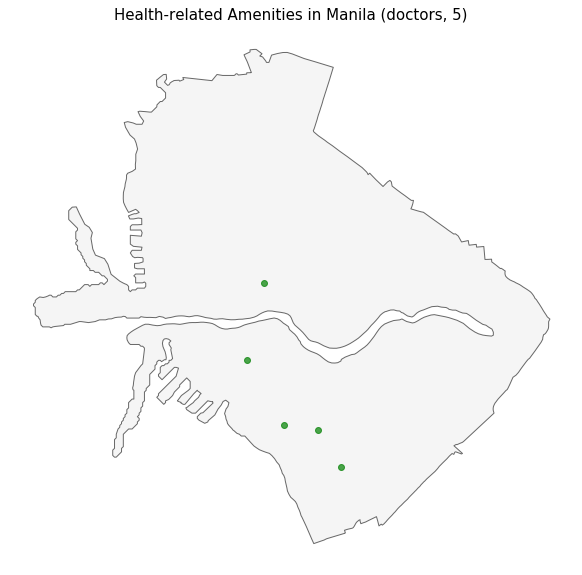

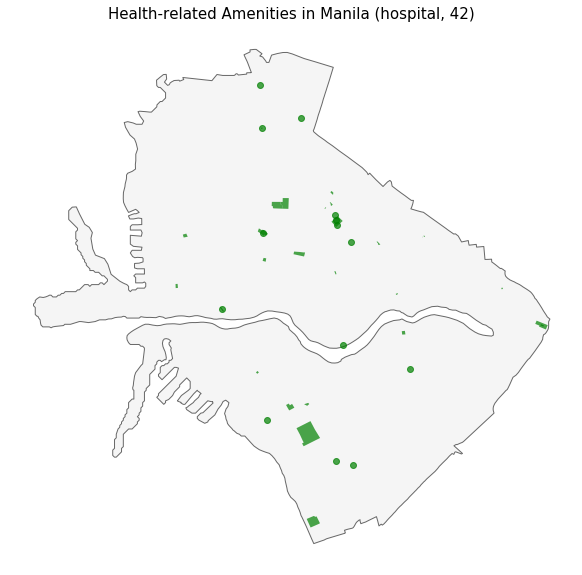

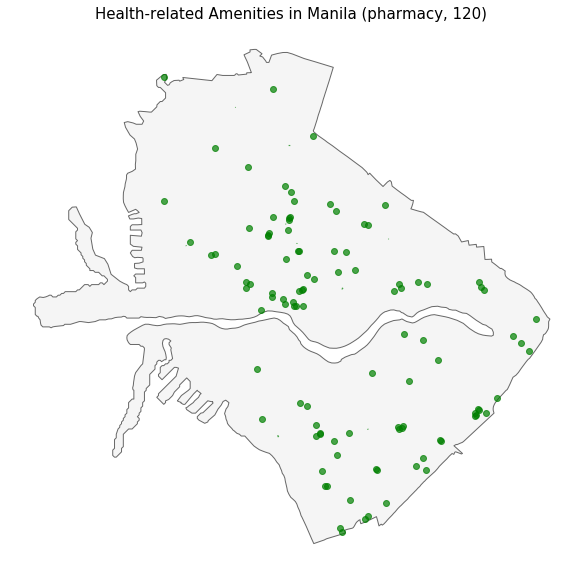

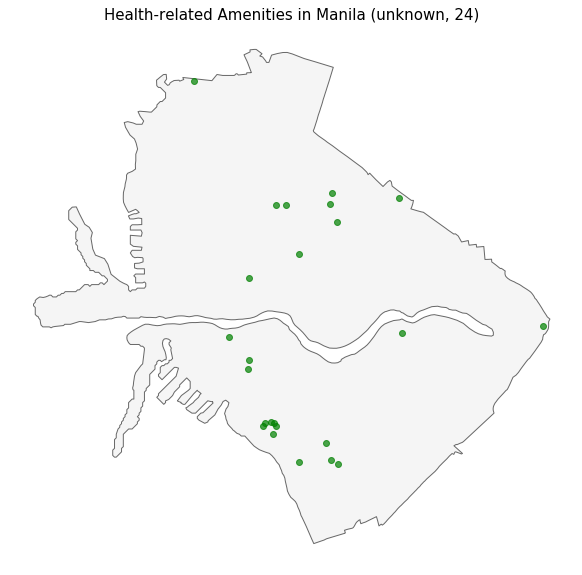

In [22]:
mm_mnl_healthsites = gpd.sjoin(healthsites, mm_mnl, op='within')

for amenity in sorted(mm_mnl_healthsites['amenity'].unique()):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.axis('off')
    
    temp_gdf_amenities = mm_mnl_healthsites[mm_mnl_healthsites['amenity'] == amenity]

    mm_mnl.plot(ax=ax, color='whitesmoke', edgecolor='dimgray')
    temp_gdf_amenities.plot(ax=ax, color='green', alpha=0.7)
    ax.set_title('Health-related Amenities in Manila (' + amenity + ', ' + str(temp_gdf_amenities.shape[0]) +')', fontsize=15)
    fig.savefig('Manila_' + amenity + '.png')

---

### Quezon City

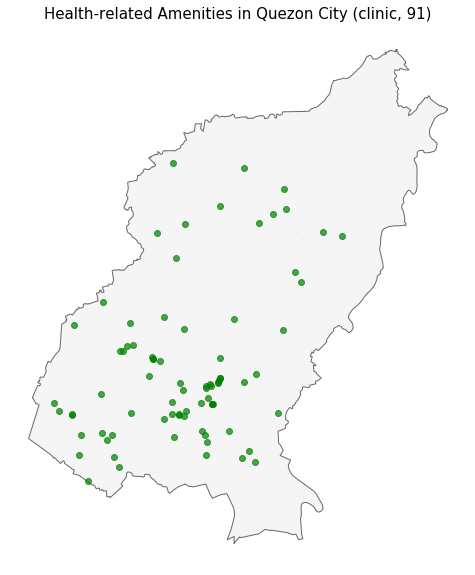

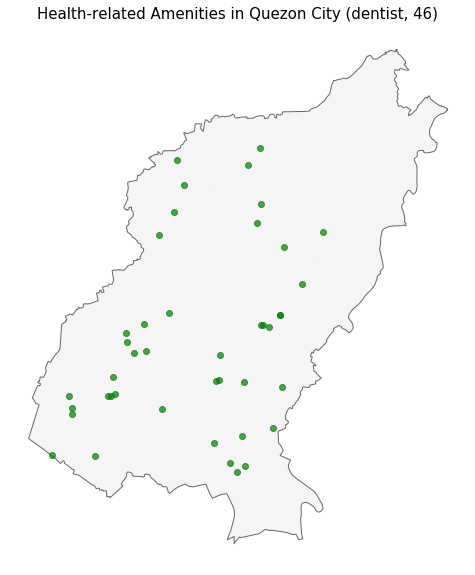

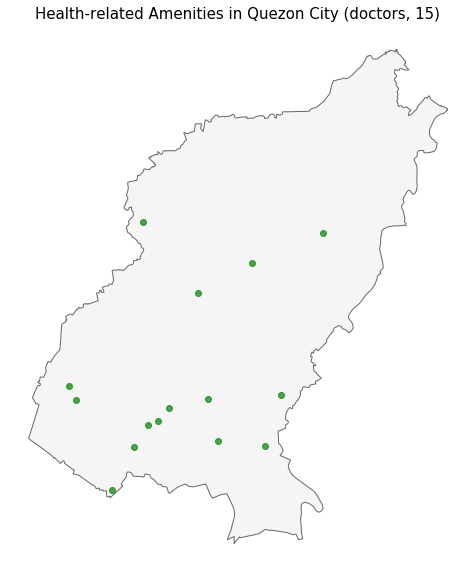

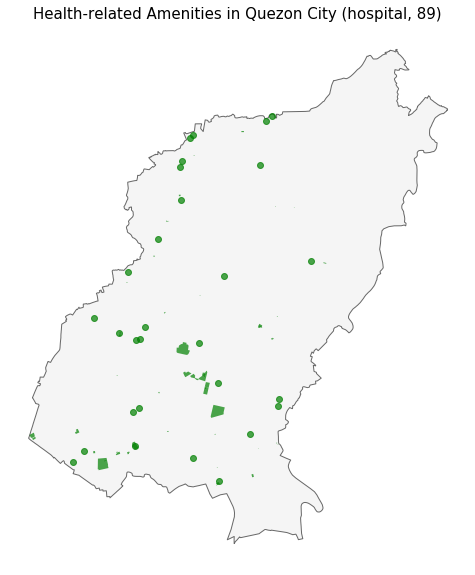

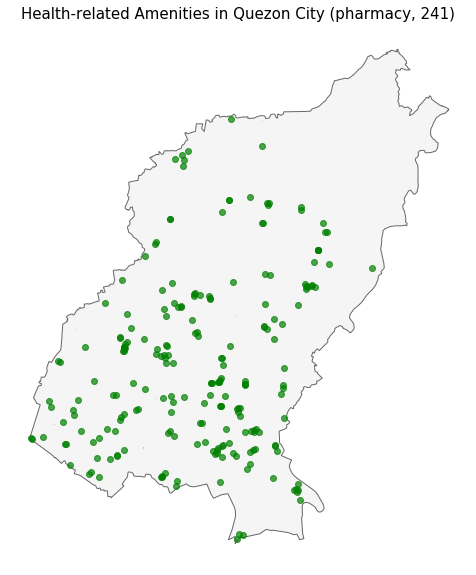

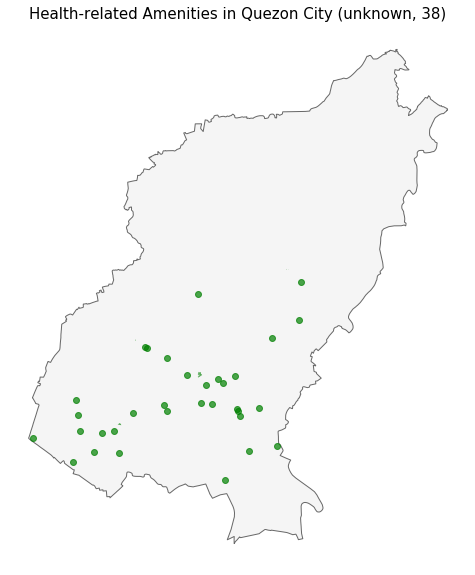

In [25]:
mm_qc_healthsites = gpd.sjoin(healthsites, mm_qc, op='within')

for amenity in sorted(mm_qc_healthsites['amenity'].unique()):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.axis('off')
    
    temp_gdf_amenities = mm_qc_healthsites[mm_qc_healthsites['amenity'] == amenity]

    mm_qc.plot(ax=ax, color='whitesmoke', edgecolor='dimgray')
    temp_gdf_amenities.plot(ax=ax, color='green', alpha=0.7)
    ax.set_title('Health-related Amenities in Quezon City (' + amenity + ', ' + str(temp_gdf_amenities.shape[0]) +')', fontsize=15)
    fig.savefig('Quezon_City_' + amenity + '.png')

---

### Pasay City

clinic: 10
dentist: 3
doctors: 2
hospital: 6
pharmacy: 32
unknown: 2


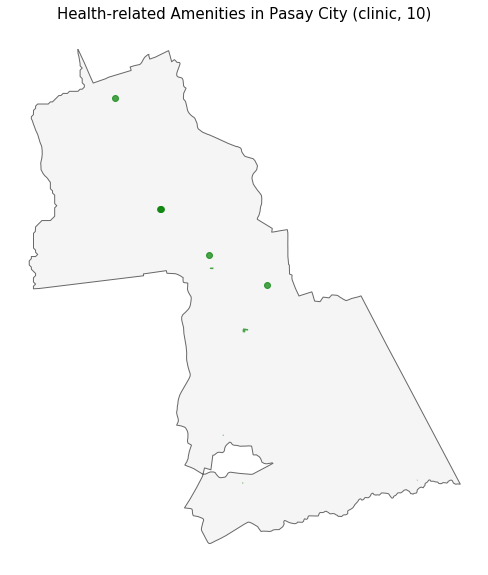

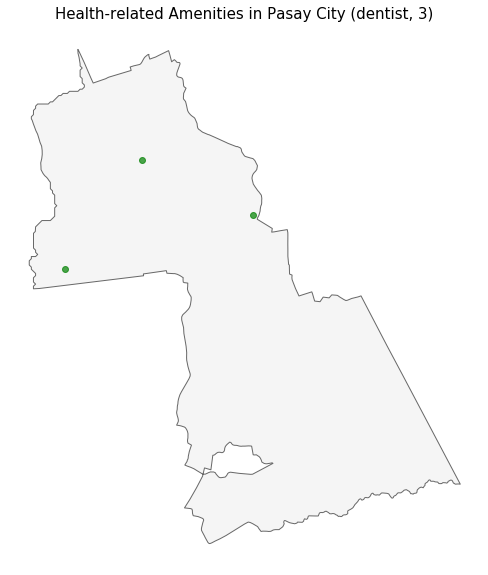

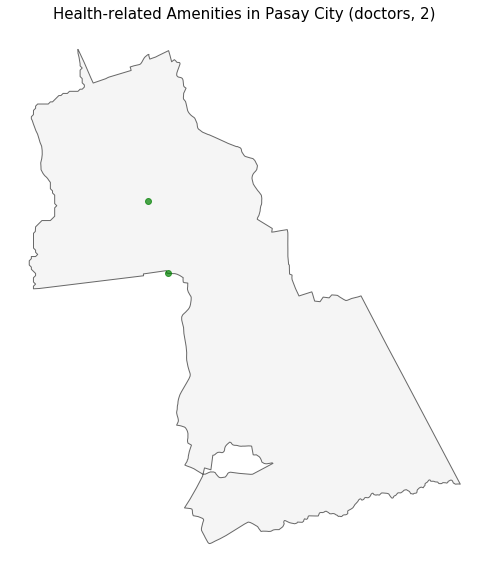

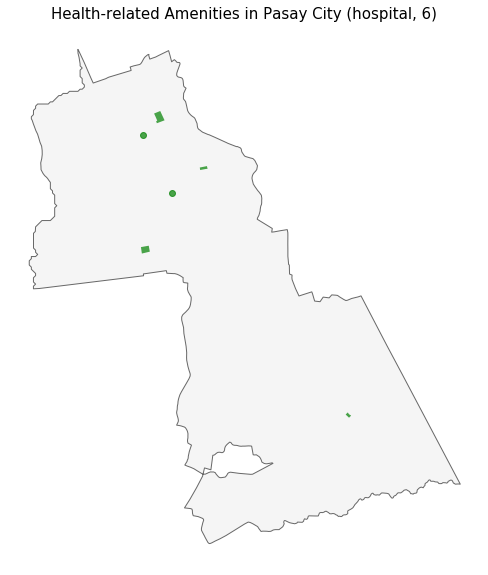

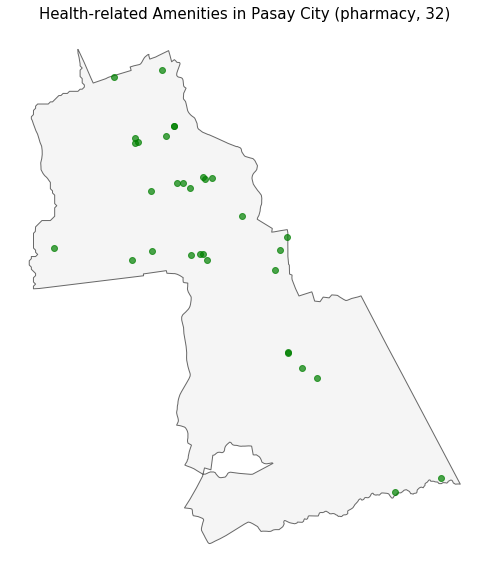

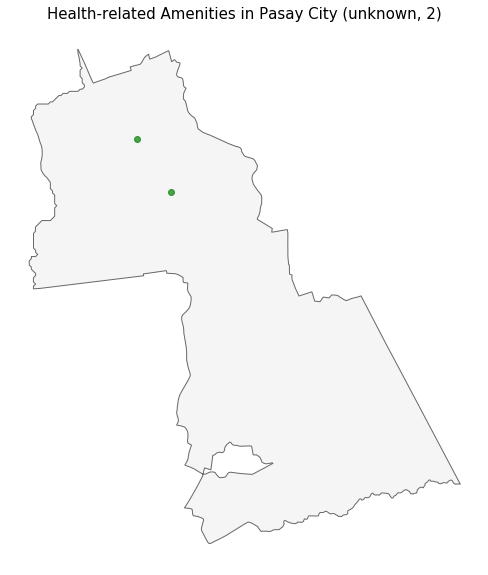

In [24]:
mm_pasay_healthsites = gpd.sjoin(healthsites, mm_pasay, op='within')

for amenity in sorted(mm_pasay_healthsites['amenity'].unique()):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.axis('off')
    
    temp_gdf_amenities = mm_pasay_healthsites[mm_pasay_healthsites['amenity'] == amenity]

    mm_pasay.plot(ax=ax, color='whitesmoke', edgecolor='dimgray')
    temp_gdf_amenities.plot(ax=ax, color='green', alpha=0.7)
    ax.set_title('Health-related Amenities in Pasay City (' + amenity + ', ' + str(temp_gdf_amenities.shape[0]) +')', fontsize=15)
    fig.savefig('Pasay_City_' + amenity + '.png')